In [58]:
import geopandas as gpd
import pygeos
import numpy as np

In [22]:
df = gpd.read_file('/Users/martin/Dropbox/Academia/Data/Geo/Nairobi/sample.gpkg').explode().reset_index(drop=True)

<AxesSubplot:>

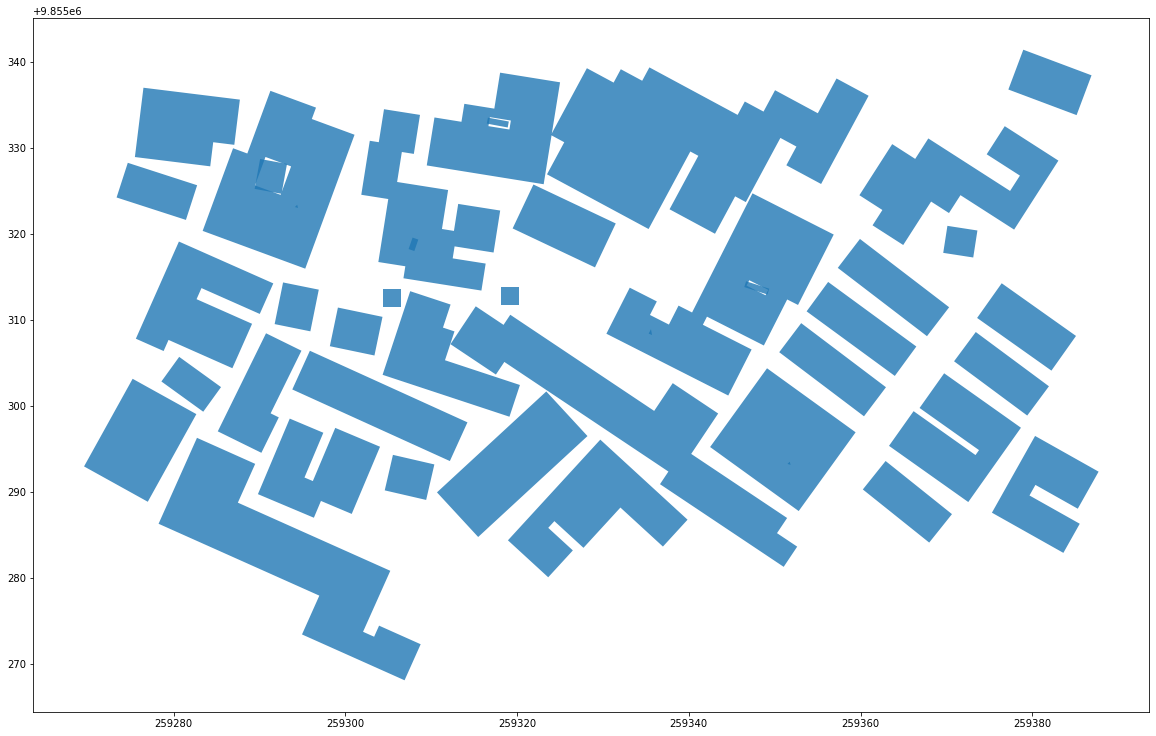

In [67]:
df.plot(figsize=(20, 20), alpha=.8)

In [63]:
def fill_insides(df):
    """
    Remove faulty polygons inside other. Close gaps.
    
    requires pygeos and geopandas 0.8+
    """
    polys = pygeos.polygons(pygeos.get_exterior_ring(df.geometry.values.data))
    inp, res = pygeos.STRtree(polys).query_bulk(polys, predicate='contains_properly')
    cleaner = np.delete(polys, res)
    return gpd.GeoSeries(cleaner, crs=df.crs)

<AxesSubplot:>

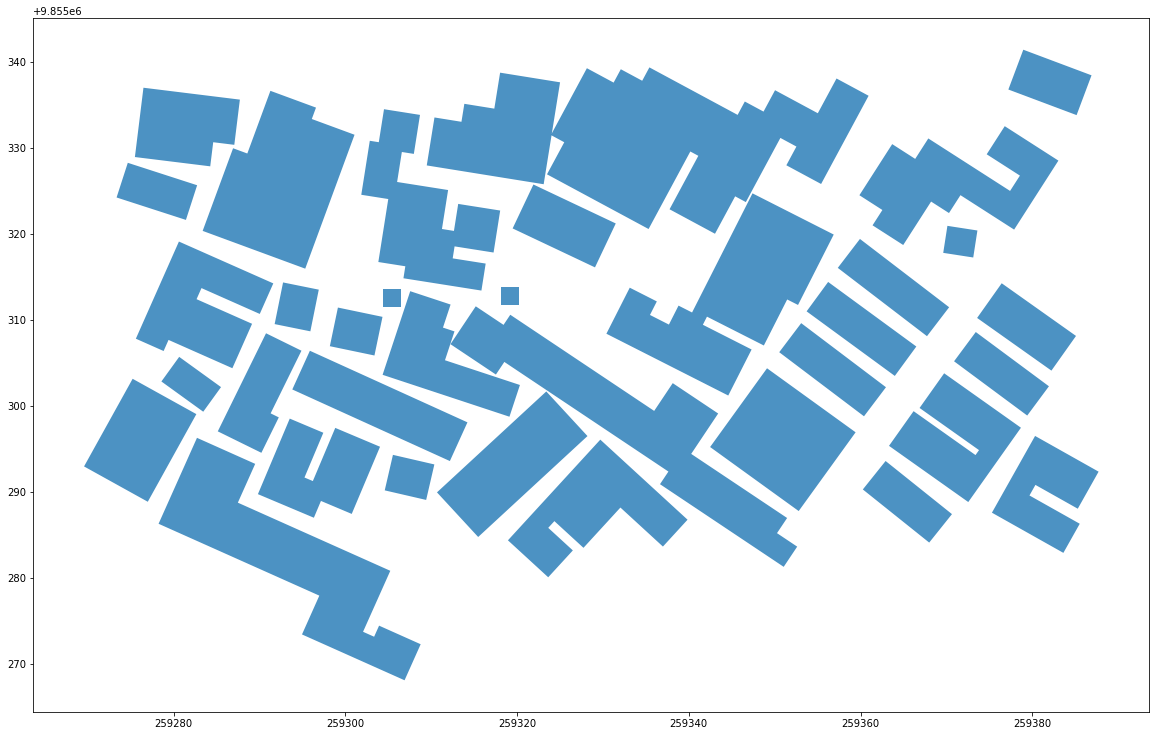

In [68]:
fill_insides(df).plot(figsize=(20, 20), alpha=.8)